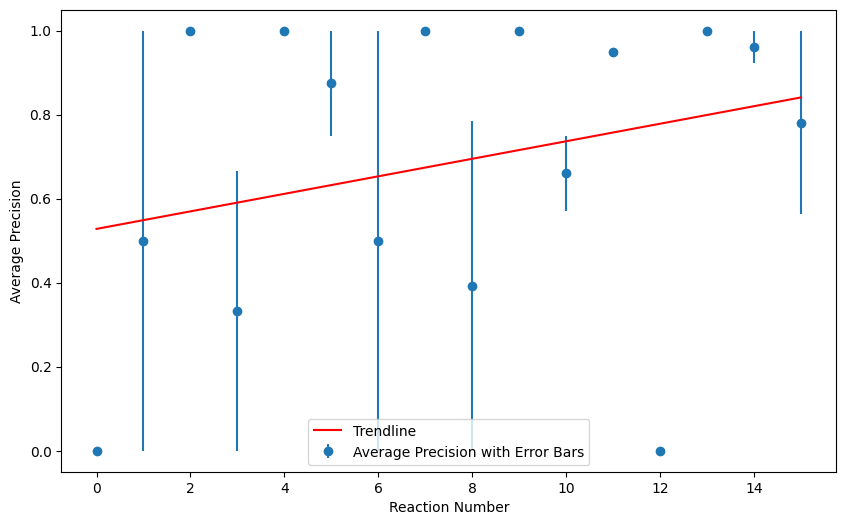

In [40]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

with open("selected_entries.json", "r") as file:
    data = json.load(file)

rxn_precision = defaultdict(list)

for entry in data:
    if entry["precision"] is not None:
        rxn_precision[entry["rxn_number"]].append(entry["precision"])

avg_precision = {rxn: np.mean(precisions) for rxn, precisions in rxn_precision.items()}
std_precision = {rxn: np.std(precisions) for rxn, precisions in rxn_precision.items()}

sorted_rxn_numbers = sorted(avg_precision.keys())
sorted_avg_precisions = [avg_precision[rxn] for rxn in sorted_rxn_numbers]
sorted_std_precisions = [std_precision[rxn] for rxn in sorted_rxn_numbers]

plt.figure(figsize=(10, 6))
plt.errorbar(
    sorted_rxn_numbers,
    sorted_avg_precisions,
    yerr=sorted_std_precisions,
    fmt="o",
    label="Average Precision with Error Bars",
)

z = np.polyfit(sorted_rxn_numbers, sorted_avg_precisions, 1)
p = np.poly1d(z)
plt.plot(
    sorted_rxn_numbers,
    p(sorted_rxn_numbers),
    linestyle="-",
    color="red",
    label="Trendline",
)

plt.xlabel("Reaction Number")
plt.ylabel("Average Precision")
plt.legend()

plt.savefig("precision_vs_rxn_number.png", bbox_inches="tight", dpi=300)
plt.show()

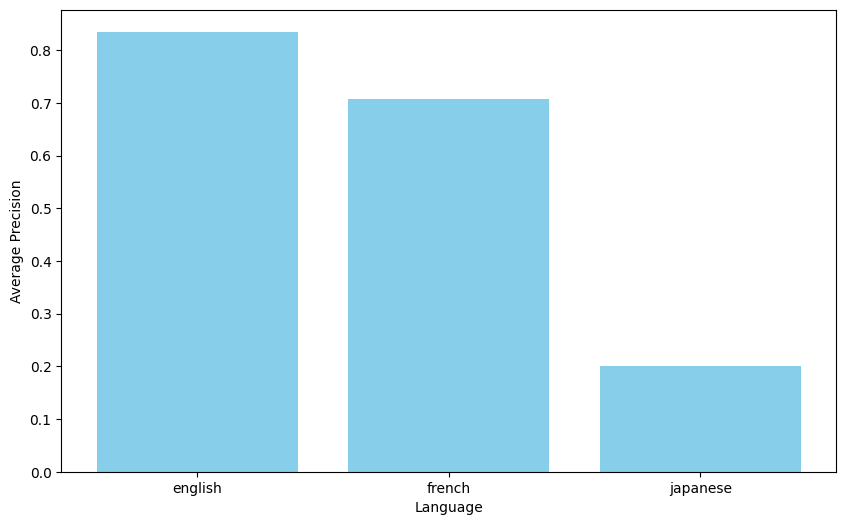

In [39]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

with open("selected_entries.json", "r") as file:
    data_precisions = json.load(file)

with open("enhanced_doi_list.json", "r") as file:
    data_languages = json.load(file)


def normalize_language(language):
    language = language.lower()
    if "french" in language:
        return "french"
    elif "english" in language:
        return "english"
    elif "german" in language:
        return "german"
    else:
        return language


out_to_language = {
    entry["out"]: normalize_language(entry["language"])
    for entry in data_languages
    if "language" in entry
}

language_precisions = defaultdict(list)

for entry in data_precisions:
    language = out_to_language.get(entry["out"])
    if language and entry["precision"] is not None and language != "german":
        language_precisions[language].append(entry["precision"])

avg_precision = {
    language: np.mean(precisions)
    for language, precisions in language_precisions.items()
}

sorted_languages = sorted(avg_precision.keys())
sorted_avg_precisions = [avg_precision[language] for language in sorted_languages]

plt.figure(figsize=(10, 6))
plt.bar(sorted_languages, sorted_avg_precisions, color="skyblue")

plt.xlabel("Language")
plt.ylabel("Average Precision")

plt.savefig("average_precision_by_language.png", bbox_inches="tight", dpi=300)
plt.show()

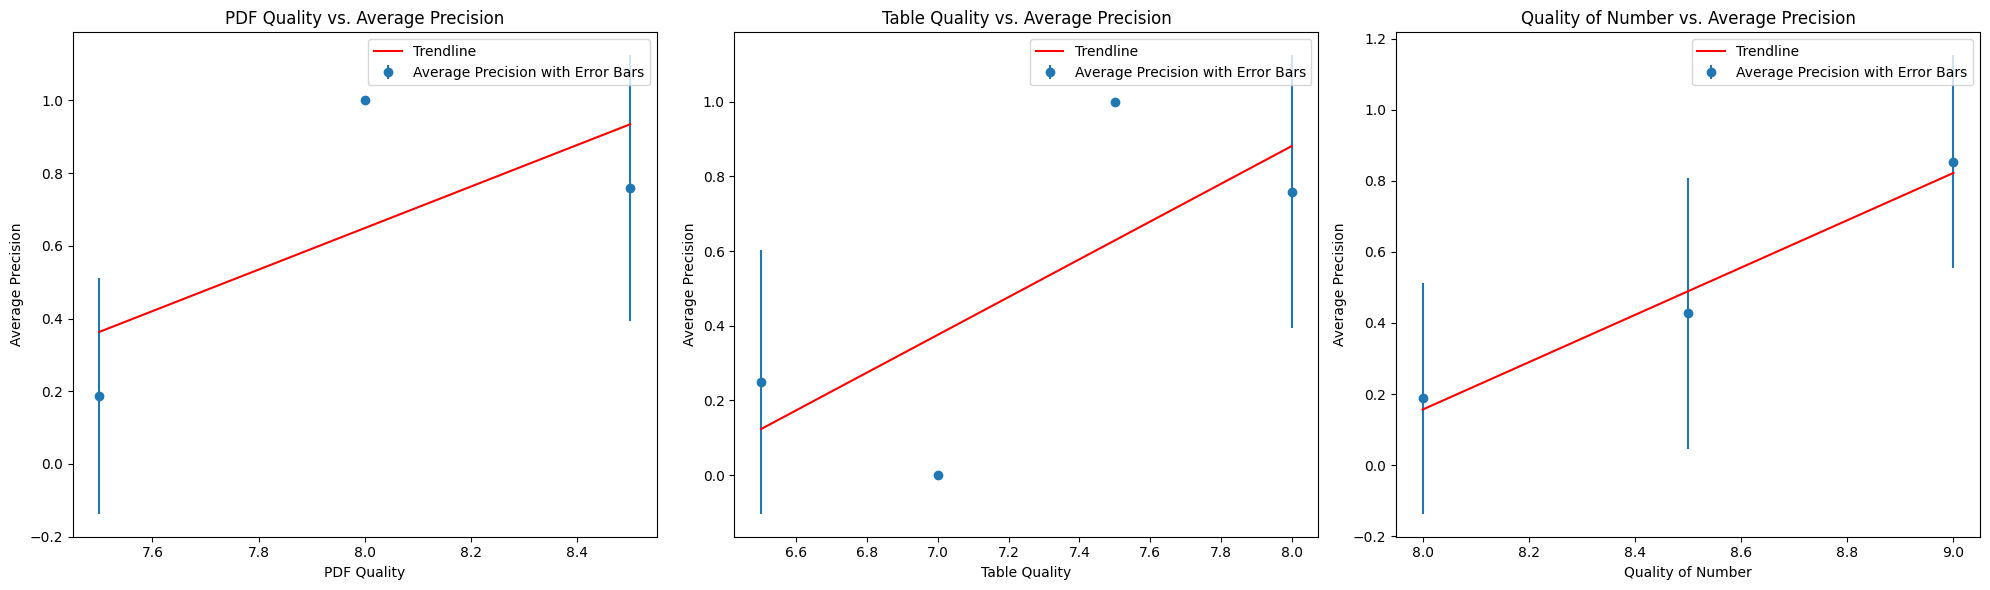

In [1]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# JSON-Dateien laden
with open("selected_entries.json", "r") as file:
    data_precisions = json.load(file)

with open("enhanced_doi_list.json", "r") as file:
    data_quality = json.load(file)

# Mapping von out zu Präzision und Qualitätsdaten
out_to_precision = {
    entry["out"]: entry["precision"]
    for entry in data_precisions
    if entry["precision"] is not None
}
out_to_quality = {entry["out"]: entry for entry in data_quality}

# Listen zur Speicherung der Daten
pdf_quality = defaultdict(list)
table_quality = defaultdict(list)
quality_of_number = defaultdict(list)

# Sammeln der Daten
for out, precision in out_to_precision.items():
    if out in out_to_quality:
        entry = out_to_quality[out]
        pdf_quality[entry["pdf_quality"]].append(precision)
        table_quality[entry["table_quality"]].append(precision)
        quality_of_number[entry["quality_of_number"]].append(precision)

# Durchschnitt und Standardabweichung berechnen
avg_precision_pdf_quality = {
    quality: np.mean(precisions) for quality, precisions in pdf_quality.items()
}
std_precision_pdf_quality = {
    quality: np.std(precisions) for quality, precisions in pdf_quality.items()
}

avg_precision_table_quality = {
    quality: np.mean(precisions) for quality, precisions in table_quality.items()
}
std_precision_table_quality = {
    quality: np.std(precisions) for quality, precisions in table_quality.items()
}

avg_precision_quality_of_number = {
    quality: np.mean(precisions) for quality, precisions in quality_of_number.items()
}
std_precision_quality_of_number = {
    quality: np.std(precisions) for quality, precisions in quality_of_number.items()
}

# Sortierte Listen erstellen
sorted_pdf_quality = sorted(avg_precision_pdf_quality.keys())
sorted_avg_precisions_pdf = [
    avg_precision_pdf_quality[quality] for quality in sorted_pdf_quality
]
sorted_std_precisions_pdf = [
    std_precision_pdf_quality[quality] for quality in sorted_pdf_quality
]

sorted_table_quality = sorted(avg_precision_table_quality.keys())
sorted_avg_precisions_table = [
    avg_precision_table_quality[quality] for quality in sorted_table_quality
]
sorted_std_precisions_table = [
    std_precision_table_quality[quality] for quality in sorted_table_quality
]

sorted_quality_of_number = sorted(avg_precision_quality_of_number.keys())
sorted_avg_precisions_number = [
    avg_precision_quality_of_number[quality] for quality in sorted_quality_of_number
]
sorted_std_precisions_number = [
    std_precision_quality_of_number[quality] for quality in sorted_quality_of_number
]

# Erstellen der Subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot für PDF-Qualität
axes[0].errorbar(
    sorted_pdf_quality,
    sorted_avg_precisions_pdf,
    yerr=sorted_std_precisions_pdf,
    fmt="o",
    label="Average Precision with Error Bars",
)
z_pdf = np.polyfit(sorted_pdf_quality, sorted_avg_precisions_pdf, 1)
p_pdf = np.poly1d(z_pdf)
axes[0].plot(
    sorted_pdf_quality,
    p_pdf(sorted_pdf_quality),
    linestyle="-",
    color="red",
    label="Trendline",
)
axes[0].set_xlabel("PDF Quality")
axes[0].set_ylabel("Average Precision")
axes[0].legend()
axes[0].set_title("PDF Quality vs. Average Precision")

# Plot für Tabellenqualität
axes[1].errorbar(
    sorted_table_quality,
    sorted_avg_precisions_table,
    yerr=sorted_std_precisions_table,
    fmt="o",
    label="Average Precision with Error Bars",
)
z_table = np.polyfit(sorted_table_quality, sorted_avg_precisions_table, 1)
p_table = np.poly1d(z_table)
axes[1].plot(
    sorted_table_quality,
    p_table(sorted_table_quality),
    linestyle="-",
    color="red",
    label="Trendline",
)
axes[1].set_xlabel("Table Quality")
axes[1].set_ylabel("Average Precision")
axes[1].legend()
axes[1].set_title("Table Quality vs. Average Precision")

# Plot für Qualität der Nummern
axes[2].errorbar(
    sorted_quality_of_number,
    sorted_avg_precisions_number,
    yerr=sorted_std_precisions_number,
    fmt="o",
    label="Average Precision with Error Bars",
)
z_number = np.polyfit(sorted_quality_of_number, sorted_avg_precisions_number, 1)
p_number = np.poly1d(z_number)
axes[2].plot(
    sorted_quality_of_number,
    p_number(sorted_quality_of_number),
    linestyle="-",
    color="red",
    label="Trendline",
)
axes[2].set_xlabel("Quality of Number")
axes[2].set_ylabel("Average Precision")
axes[2].legend()
axes[2].set_title("Quality of Number vs. Average Precision")

plt.tight_layout()
plt.savefig("quality_vs_precision_all.png", bbox_inches="tight", dpi=300)
plt.show()

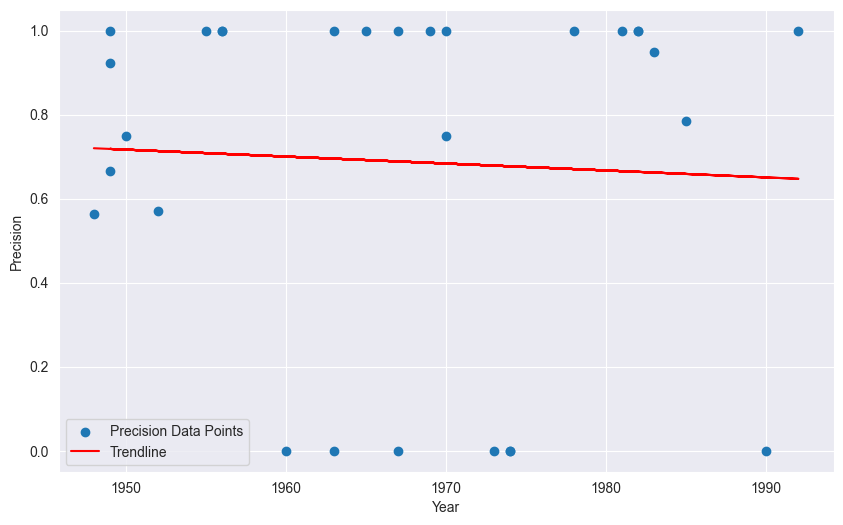

In [18]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# JSON-Dateien laden
with open("selected_entries.json", "r") as file:
    data_precisions = json.load(file)

with open("enhanced_doi_list.json", "r") as file:
    data_quality = json.load(file)

# Mapping von out zu Präzision und Jahr
out_to_precision = {
    entry["out"]: entry["precision"]
    for entry in data_precisions
    if entry["precision"] is not None
}
out_to_year = {entry["out"]: entry["year"] for entry in data_quality if "year" in entry}

# Listen zur Speicherung der Daten
years = []
precisions = []

# Sammeln der Daten
for out, precision in out_to_precision.items():
    if out in out_to_year:
        year = out_to_year[out]
        years.append(year)
        precisions.append(precision)

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(years, precisions, label="Precision Data Points")

# Trendlinie berechnen und hinzufügen
z = np.polyfit(years, precisions, 1)
p = np.poly1d(z)
plt.plot(years, p(years), linestyle="-", color="red", label="Trendline")

plt.xlabel("Year")
plt.ylabel("Precision")
plt.legend()

# Diagramm speichern und anzeigen
plt.savefig("precision_vs_year.png", bbox_inches="tight", dpi=300)
plt.show()

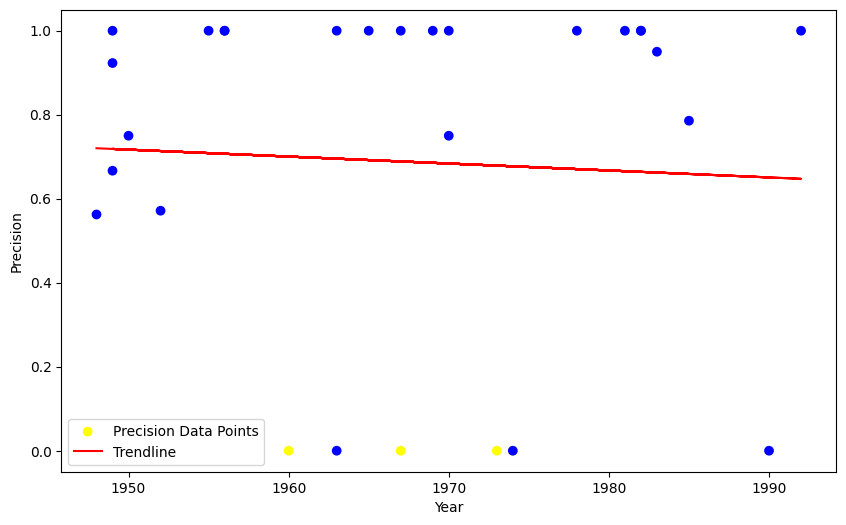

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np

# JSON-Dateien laden
with open("selected_entries.json", "r") as file:
    data_precisions = json.load(file)

with open("enhanced_doi_list.json", "r") as file:
    data_quality = json.load(file)

# Mapping von out zu Präzision, Jahr und precision_score
out_to_precision = {
    entry["out"]: entry["precision"]
    for entry in data_precisions
    if entry["precision"] is not None
}
out_to_year = {entry["out"]: entry["year"] for entry in data_quality if "year" in entry}
out_to_precision_score = {
    entry["out"]: entry["precision_score"]
    for entry in data_quality
    if "precision_score" in entry
}

# Listen zur Speicherung der Daten
years = []
precisions = []
colors = []

# Sammeln der Daten
for out, precision in out_to_precision.items():
    if out in out_to_year and out in out_to_precision_score:
        year = out_to_year[out]
        precision_score = out_to_precision_score[out]
        years.append(year)
        precisions.append(precision)
        # Bestimmen der Farbe basierend auf precision_score
        if precision_score == 0:
            colors.append("yellow")
        else:
            colors.append("blue")

# Überprüfen, ob die Listen leer sind
if not years or not precisions:
    print("Error: No data available for plotting.")
else:
    # Plot erstellen
    plt.figure(figsize=(10, 6))
    plt.scatter(years, precisions, c=colors, label="Precision Data Points")

    # Trendlinie berechnen und hinzufügen
    z = np.polyfit(years, precisions, 1)
    p = np.poly1d(z)
    plt.plot(years, p(years), linestyle="-", color="red", label="Trendline")

    plt.xlabel("Year")
    plt.ylabel("Precision")
    plt.legend()

    # Diagramm speichern und anzeigen
    plt.savefig("precision_vs_year_with_score.png", bbox_inches="tight", dpi=300)
    plt.show()

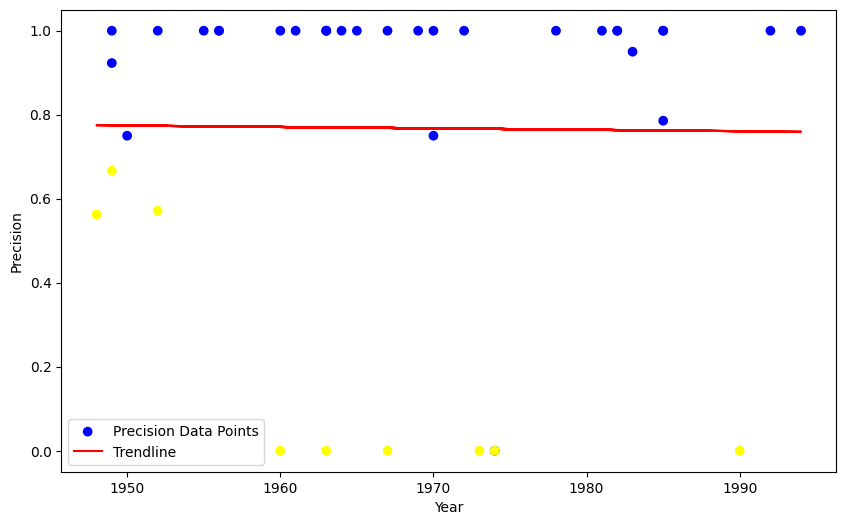

In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load JSON file
with open("enhanced_doi_list.json", "r") as file:
    data_quality = json.load(file)

# Lists to store data
years = []
precisions = []
colors = []

# Collect data for all entries with precision and precision_score
for entry in data_quality:
    if (
        "precision" in entry
        and entry["precision"] is not None
        and "precision_score" in entry
        and entry["precision_score"] is not None
    ):
        year = entry.get("year")
        precision = entry["precision"]
        precision_score = entry["precision_score"]

        if year is not None:
            years.append(year)
            precisions.append(precision)
            # Determine color based on precision_score
            if precision_score == 0:
                colors.append("yellow")
            else:
                colors.append("blue")

# Check if lists are empty
if not years or not precisions:
    print("Error: No data available for plotting.")
else:
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.scatter(years, precisions, c=colors, label="Precision Data Points")

    # Calculate and add trendline
    z = np.polyfit(years, precisions, 1)
    p = np.poly1d(z)
    plt.plot(years, p(years), linestyle="-", color="red", label="Trendline")

    plt.xlabel("Year")
    plt.ylabel("Precision")
    plt.legend()

    # Save and show plot
    plt.savefig("precision_vs_year_with_score.png", bbox_inches="tight", dpi=300)
    plt.show()

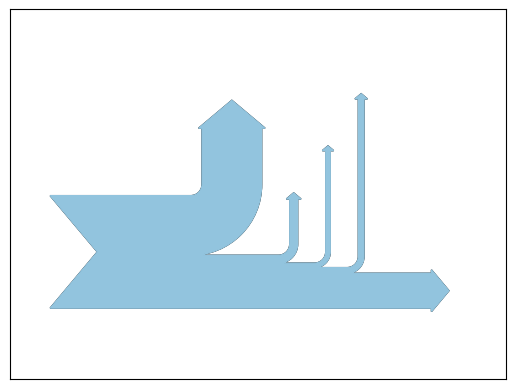

In [30]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

flows = [1, -0.53, -0.07, -0.04, -0.05, -0.31]  # flows
labels = [
    "Initial corpus of 866 articles",
    "Removing duplicate articles",
    "Random Forest Precision Filter",
    "Confindence interval filter",
    "Calculated vs. R-product filter",
    "Database for modeling",
]  # Labels
orientations = [0, 1, 1, 1, 1, 0]  # Orientation

sankey = Sankey(
    flows=flows,
    orientations=orientations,
    pathlengths=[0.6, 0.6, 0.5, 1.0, 1.5, 0.6],
    labels=None,
    margin=0.6,
)
sankey.add(
    flows=flows,
    orientations=orientations,
    pathlengths=[0.6, 0.6, 0.5, 1.0, 1.5, 0.6],
    facecolor="#92C4DE",
    edgecolor="#92C4DE",
    labels=None,
)

sankey.finish()

plt.savefig("sankey.pdf", dpi=300)
plt.show()